In [3]:
import os
import glob
import numpy as np

import logging
logger = logging.getLogger(__name__)

from src.config import output_data_dir

import matplotlib.pyplot as plt

import re
from sklearn.feature_selection import f_regression, mutual_info_regression

def find_csv_filenames(path_to_dir, suffix=".csv" ):
    filenames = os.listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]


csv_dir = os.path.join(output_data_dir, "twoballs0932\imgs")

VAR_NAMES = ['A0', 'A1', 'L0', 'L1']
EPOCH_IDX = dict({1:0, 2:1, 5:2, 10:3, 20:4, 50:5})

MI = np.zeros((10,4,4,250))
      
def handle(data, round, epoch):
    N = data.shape[1]
    assert(N == 4)
       
    for i in range(N):
        mi = mutual_info_regression(data, (data[:,i]))
        mi /= np.max(mi)
  
        for j in range(N):
            MI[round, i, j, epoch] = mi[j]
    
for fname in find_csv_filenames(csv_dir):
    fpath = os.path.join(csv_dir, fname)

    logging.info("processing fname=%s" % fpath)
    
    my_data = np.genfromtxt(fpath, delimiter=',')
    m = re.match(r'round-(\d+)_epoch-(\d+).csv', fname)
    if not m:
        logger.error("file name %s does not match pattern" % fpath)
        continue
        
    round, epoch = m.group(1), m.group(2)
    handle(my_data, int(round), int(epoch))

2021-03-07 09:51:47,241 - root - INFO - processing fname=C:\Users\alexa\Documents\dvp\autoenc2\data\output\twoballs0932\imgs\round-0_epoch-0.csv
2021-03-07 09:51:47,330 - root - INFO - processing fname=C:\Users\alexa\Documents\dvp\autoenc2\data\output\twoballs0932\imgs\round-0_epoch-1.csv
2021-03-07 09:51:47,417 - root - INFO - processing fname=C:\Users\alexa\Documents\dvp\autoenc2\data\output\twoballs0932\imgs\round-0_epoch-10.csv
2021-03-07 09:51:47,500 - root - INFO - processing fname=C:\Users\alexa\Documents\dvp\autoenc2\data\output\twoballs0932\imgs\round-0_epoch-11.csv
2021-03-07 09:51:47,583 - root - INFO - processing fname=C:\Users\alexa\Documents\dvp\autoenc2\data\output\twoballs0932\imgs\round-0_epoch-12.csv
2021-03-07 09:51:47,668 - root - INFO - processing fname=C:\Users\alexa\Documents\dvp\autoenc2\data\output\twoballs0932\imgs\round-0_epoch-13.csv
2021-03-07 09:51:47,751 - root - INFO - processing fname=C:\Users\alexa\Documents\dvp\autoenc2\data\output\twoballs0932\imgs\r

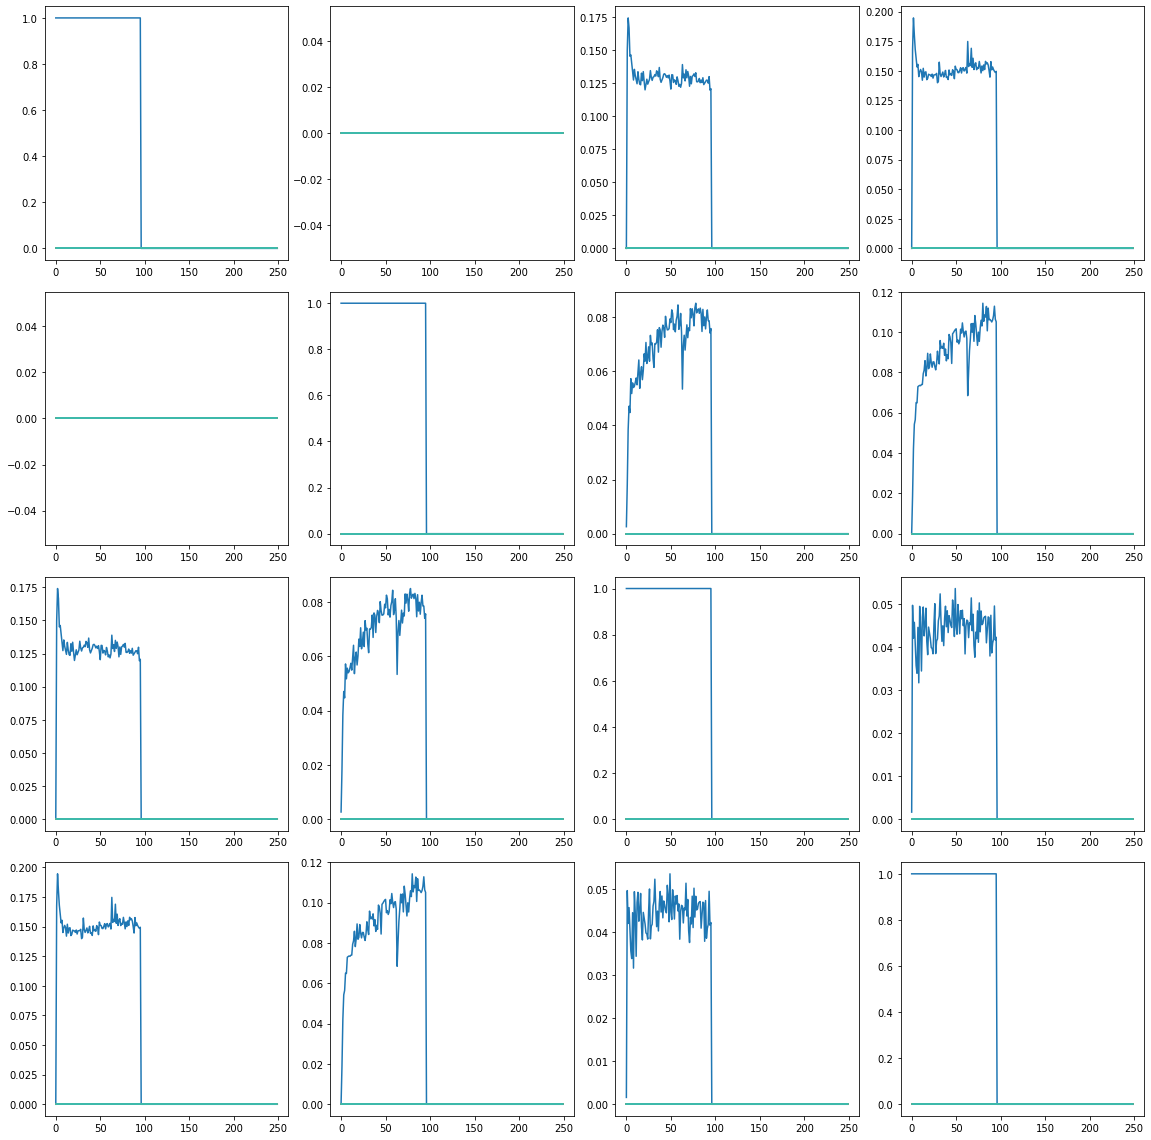

In [4]:
fig, axs = plt.subplots(4, 4, figsize=(16,16))
fig.tight_layout()

for k in range(MI.shape[0]):
    for i in range(MI.shape[1]):
        for j in range(MI.shape[2]):
            axs[i,j].plot(MI[k, i, j])
    